## Verilerin istatistiksel olarak incelenmesi ve aykırı değerlerin ayıklanması

Gerekli paketlerin yüklenmesi

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Verilerin yüklenmesi

In [2]:
df = pd.read_csv('hepsiemlak.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8105 entries, 0 to 8104
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          8105 non-null   object
 1   district      8105 non-null   object
 2   neighborhood  8105 non-null   object
 3   room          8105 non-null   int64 
 4   living_room   8105 non-null   int64 
 5   area          8105 non-null   int64 
 6   age           8105 non-null   int64 
 7   floor         8105 non-null   int64 
 8   price         8105 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 570.0+ KB
None


Sütunların değişken tiplerinin ayarlanması

In [3]:
df['city'] = df['city'].astype('category')
df['district'] = df['district'].astype('category')
df['neighborhood'] = df['neighborhood'].astype('category')
df['room'] = df['room'].astype('int')
df['living_room'] = df['living_room'].astype('int')
df['area'] = df['area'].astype('int')
df['age'] = df['age'].astype('int')
df['floor'] = df['floor'].astype('int')
df['price'] = df['price'].astype('int')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8105 entries, 0 to 8104
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   city          8105 non-null   category
 1   district      8105 non-null   category
 2   neighborhood  8105 non-null   category
 3   room          8105 non-null   int64   
 4   living_room   8105 non-null   int64   
 5   area          8105 non-null   int64   
 6   age           8105 non-null   int64   
 7   floor         8105 non-null   int64   
 8   price         8105 non-null   int64   
dtypes: category(3), int64(6)
memory usage: 436.7 KB
None


Değişkenlerin minimum, maximum ve çeyreklik değerlerinin görüntülenmesi

In [4]:
columns = df.select_dtypes(include=[np.number]).columns
min_values = []
max_values = []
for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    min_value = Q1 - 1.5 * IQR
    max_value = Q3 + 1.5 * IQR
    min_values.append(min_value)
    max_values.append(max_value)
    print(f"{column} min: {min_value}, max: {max_value}")

room min: 0.5, max: 4.5
living_room min: 1.0, max: 1.0
area min: -17.5, max: 242.5
age min: -20.0, max: 44.0
floor min: -2.0, max: 6.0
price min: -18000.0, max: 62000.0


Aykırı değerlerin temizlenmesi

In [5]:
for i, column in enumerate(columns):
    df = df[(df[column] >= min_values[i]) & (df[column] <= max_values[i])]

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6212 entries, 0 to 8103
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   city          6212 non-null   category
 1   district      6212 non-null   category
 2   neighborhood  6212 non-null   category
 3   room          6212 non-null   int64   
 4   living_room   6212 non-null   int64   
 5   area          6212 non-null   int64   
 6   age           6212 non-null   int64   
 7   floor         6212 non-null   int64   
 8   price         6212 non-null   int64   
dtypes: category(3), int64(6)
memory usage: 388.9 KB
None


In [7]:
print(df.describe())

              room  living_room         area          age        floor  \
count  6212.000000       6212.0  6212.000000  6212.000000  6212.000000   
mean      2.176272          1.0   104.669350    12.653896     2.353831   
std       0.826815          0.0    39.442494    10.451565     1.560680   
min       1.000000          1.0     5.000000     0.000000    -2.000000   
25%       2.000000          1.0    75.000000     4.000000     1.000000   
50%       2.000000          1.0   100.000000    10.000000     2.000000   
75%       3.000000          1.0   130.000000    20.000000     3.000000   
max       4.000000          1.0   240.000000    44.000000     6.000000   

              price  
count   6212.000000  
mean   17900.975853  
std    10467.582893  
min        1.000000  
25%    11000.000000  
50%    15000.000000  
75%    21000.000000  
max    60000.000000  


array([[<Axes: title={'center': 'room'}>,
        <Axes: title={'center': 'living_room'}>],
       [<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

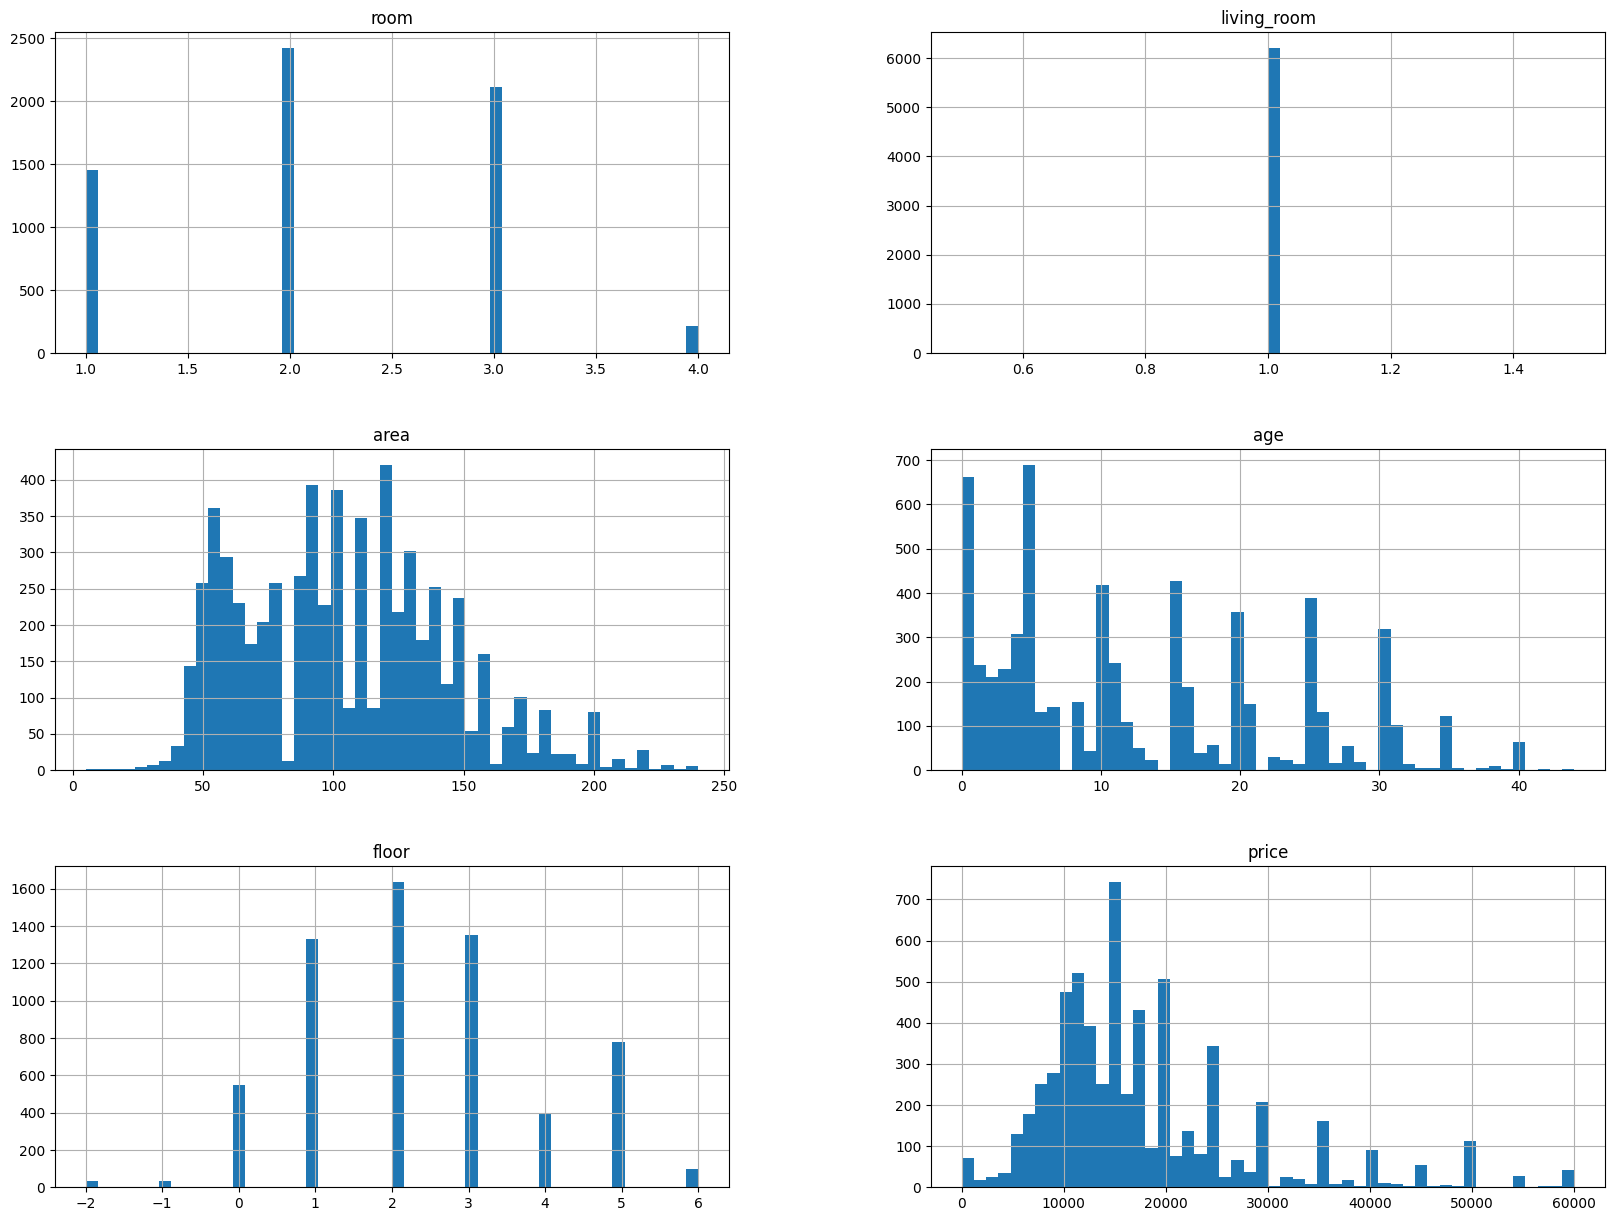

In [8]:
df.hist(bins=50, figsize=(20, 15))

Çok aşırı düşük (1 TL) kira değerlerinin manuel olarak temizlenmesi

In [9]:
df = df[df['price'] >= 3000]

In [10]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 6116 entries, 23 to 8103
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   city          6116 non-null   category
 1   district      6116 non-null   category
 2   neighborhood  6116 non-null   category
 3   room          6116 non-null   int64   
 4   living_room   6116 non-null   int64   
 5   area          6116 non-null   int64   
 6   age           6116 non-null   int64   
 7   floor         6116 non-null   int64   
 8   price         6116 non-null   int64   
dtypes: category(3), int64(6)
memory usage: 383.3 KB
None
              room  living_room         area          age        floor  \
count  6116.000000       6116.0  6116.000000  6116.000000  6116.000000   
mean      2.180020          1.0   104.830445    12.698169     2.353499   
std       0.826463          0.0    39.467687    10.465384     1.559595   
min       1.000000          1.0     5.000000     0.000000   

Temizlenmiş ve aykırı değerlerden arınmış verilerin kaydedilmesi

In [11]:
df.to_csv('hepsiemlak_cleaned.csv', index=False)